In [2]:
import sys
sys.path.append('.')

import model

In [3]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
import random
import seaborn as sns
import statistics

In [4]:
plt.rcParams["font.family"] = "serif"

# 2D Lattice with rewiring

We start with an $m \times n$ periodic square lattice.

In [5]:
N, M = (45, 45)

g = nx.grid_2d_graph(N, M, periodic=True, create_using=None)

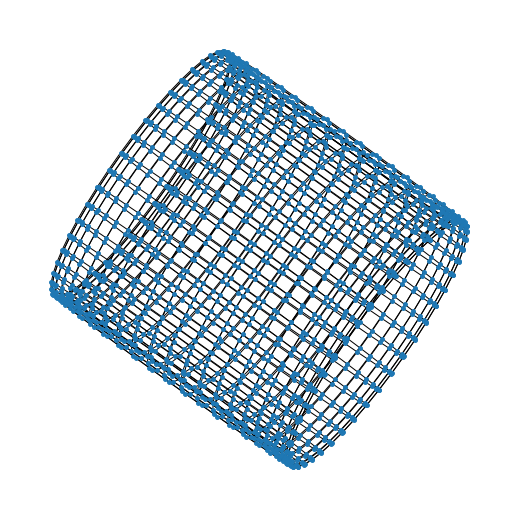

In [6]:
plt.figure(3,figsize=(7,7)) 
## draw_spectral for the lattice
foo = nx.draw_spectral(g,
                node_size = 15)

In [7]:
dummy_g = nx.grid_2d_graph(
        N,
        M,
        periodic=True,
        create_using=None
    )
torus_pos = nx.spectral_layout(dummy_g)

Then for each edge $(u,v)$, with probability $p$, we replace that edge with a new edge $(u,w)$, where $w$ is randomly sampled from the existing nodes.

In [8]:
g = model.grid_r(N,M, 0.1)

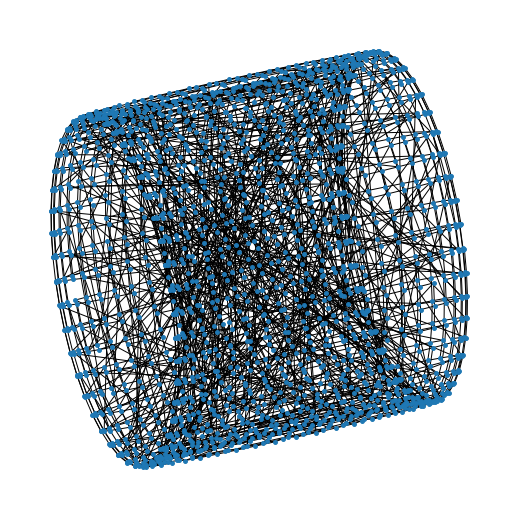

In [9]:
plt.figure(3,figsize=(7,7)) 
## draw_spectral for the lattice
nx.draw(g,
        pos = torus_pos,
        node_size = 15)

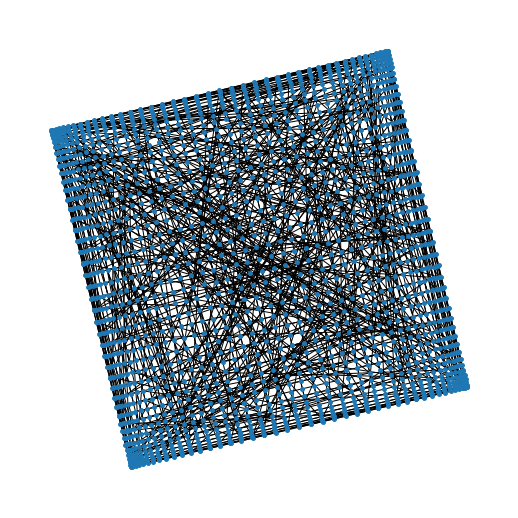

In [10]:
plt.figure(3,figsize=(7,7)) 
## draw_spectral for the lattice
nx.draw(g,
        pos = model.grid_pos(g),
        node_size = 15)

In [11]:
E = len(g.edges)

$\Sigma x^2$

In [12]:
def square_lattice_rewiring_case(N, M, p, **kwargs):

    g = nx.grid_2d_graph(N, M, periodic=True)

    for e in g.edges:
        if random.random() <= p:
            g.remove_edge(e[0],e[1])
            v = random.choice(list(g.nodes()))
            g.add_edge(e[0], v)

    g.graph['N'] = N
    g.graph['M'] = M
    g.graph['p'] = p

    return g, kwargs


def square_r_case_generator(N, M, **kwargs):
    def sqrg(**kwargs):
        return square_lattice_rewiring_case(N, M, **kwargs)
    
    return sqrg

In [13]:
g, kw = square_lattice_rewiring_case(45, 45, .9)

In [14]:
list(g.edges(data=True))

[((0, 0), (27, 20), {}),
 ((0, 0), (37, 6), {}),
 ((0, 0), (12, 32), {}),
 ((0, 0), (22, 31), {}),
 ((0, 0), (32, 10), {}),
 ((0, 0), (38, 33), {}),
 ((0, 0), (39, 28), {}),
 ((0, 1), (36, 11), {}),
 ((0, 1), (25, 41), {}),
 ((0, 1), (16, 44), {}),
 ((0, 1), (7, 34), {}),
 ((0, 1), (22, 9), {}),
 ((0, 1), (22, 39), {}),
 ((0, 2), (1, 2), {}),
 ((0, 2), (13, 23), {}),
 ((0, 2), (5, 15), {}),
 ((0, 2), (15, 31), {}),
 ((0, 2), (25, 15), {}),
 ((0, 3), (0, 4), {}),
 ((0, 3), (35, 41), {}),
 ((0, 3), (28, 31), {}),
 ((0, 3), (10, 5), {}),
 ((0, 3), (33, 30), {}),
 ((0, 3), (38, 25), {}),
 ((0, 4), (0, 5), {}),
 ((0, 4), (38, 12), {}),
 ((0, 4), (31, 42), {}),
 ((0, 4), (42, 14), {}),
 ((0, 5), (0, 6), {}),
 ((0, 5), (44, 5), {}),
 ((0, 5), (31, 21), {}),
 ((0, 6), (18, 9), {}),
 ((0, 6), (32, 6), {}),
 ((0, 6), (26, 28), {}),
 ((0, 6), (37, 27), {}),
 ((0, 7), (23, 2), {}),
 ((0, 7), (37, 3), {}),
 ((0, 7), (36, 17), {}),
 ((0, 7), (7, 38), {}),
 ((0, 8), (9, 34), {}),
 ((0, 8), (4, 17), {

In [15]:
#model.square_distance(list(g.edges(data=True))[1000], 45, 45)

[model.square_distance(e, 45, 45) for e in list(g.edges(data=True))]

[33.60059523282288,
 37.48332962798263,
 34.17601498127012,
 38.01315561749642,
 33.52610922848042,
 50.32891812864648,
 48.010415536631214,
 37.36308338453881,
 47.16990566028302,
 45.880278987817846,
 33.734255586866,
 23.40939982143925,
 43.9089968002003,
 1.0,
 24.698178070456937,
 13.92838827718412,
 32.64965543462902,
 28.178005607210743,
 1.0,
 51.66236541235796,
 39.59797974644666,
 10.198039027185569,
 42.638011210655684,
 43.9089968002003,
 1.0,
 38.8329756778952,
 49.040799340956916,
 43.174066289845804,
 1.0,
 44.0,
 34.88552708502482,
 18.24828759089466,
 32.0,
 34.058772731852805,
 42.5440947723653,
 23.53720459187964,
 37.21558813185679,
 37.36308338453881,
 31.78049716414141,
 27.51363298439521,
 9.848857801796104,
 31.0,
 33.06055050963308,
 19.6468827043885,
 23.345235059857504,
 6.324555320336759,
 20.615528128088304,
 47.885279575251516,
 32.01562118716424,
 3.1622776601683795,
 11.40175425099138,
 16.278820596099706,
 39.66106403010388,
 24.08318915758459,
 35.6931

# Generate (q,r) varied data for new results.

We start with an $m \times n$ periodic square lattice.

In [16]:
## Population parameters:
base_params_QR = {
    # will this work?
    'p' : 0.1,
    
    # Node parameter
    'A' : 1.0, # 
    
    # Edge parameter
    'W' : .5, # probability of edge activation; 2/K
    'C' : 1.0, ## all edges can be traced.
    
    ## Disease parameters

    'beta_hat' : .4, # probability of transmission upon contact
    'alpha' : .25, # probability of exposed becoming infectious
    'gamma' : .1, # probability of infectious becoming recovered
    'zeta' : .1, # probability of infectious becoming symptomatic

    ## Contact tracing parameters

    'limit' : 10, # number of time steps the contact tracing system remembers
}

To figure out the right intervals for $(q,r)$ so that there are 

In [17]:
0.1 * len(g.edges)

404.6

In [18]:
0.9 * len(g.edges)

3641.4

In [19]:
conditions_QR = {}

p = 0.1

# ratio of delta_q to delta_r so that delta_q * D = delta_r * C
qrE_ratio = ( 1 - p ) / p 

delta_r = 0.05

#q_range = np.arange(0, 1, qrE_ratio * delta_r)
#r_range = np.arange(0, 1, delta_r)

## FOR TESTING
q_range = np.arange(0.05, 1, qrE_ratio * delta_r)
r_range = np.arange(.0, 1.0, delta_r)


for q in q_range:
    for r in r_range:
        conditions_QR[f'q-{q}_r-{r}'] = {
            'C' : model.qr_knockout_lattice_proportional(g, q, r),
            'q' : q,
            'r' : r
        }
        
print(len(conditions_QR))

60


In [20]:
delta_r * qrE_ratio 

0.45

In [21]:
delta_r * E * (1 - p)

182.205

In [22]:
delta_r * qrE_ratio * E * p

182.205

In [23]:
182.25 / 4050

0.045

In [24]:
conditions_QR

{'q-0.05_r-0.0': {'C': <function model.qr_knockout_lattice_proportional.<locals>.knockout(g)>,
  'q': 0.05,
  'r': 0.0},
 'q-0.05_r-0.05': {'C': <function model.qr_knockout_lattice_proportional.<locals>.knockout(g)>,
  'q': 0.05,
  'r': 0.05},
 'q-0.05_r-0.1': {'C': <function model.qr_knockout_lattice_proportional.<locals>.knockout(g)>,
  'q': 0.05,
  'r': 0.1},
 'q-0.05_r-0.15000000000000002': {'C': <function model.qr_knockout_lattice_proportional.<locals>.knockout(g)>,
  'q': 0.05,
  'r': 0.15000000000000002},
 'q-0.05_r-0.2': {'C': <function model.qr_knockout_lattice_proportional.<locals>.knockout(g)>,
  'q': 0.05,
  'r': 0.2},
 'q-0.05_r-0.25': {'C': <function model.qr_knockout_lattice_proportional.<locals>.knockout(g)>,
  'q': 0.05,
  'r': 0.25},
 'q-0.05_r-0.30000000000000004': {'C': <function model.qr_knockout_lattice_proportional.<locals>.knockout(g)>,
  'q': 0.05,
  'r': 0.30000000000000004},
 'q-0.05_r-0.35000000000000003': {'C': <function model.qr_knockout_lattice_proportion

$T \sim (pq + (1-p)r)N$

In [25]:
def dfr(rs):
    return pd.DataFrame(
        [r for case in rs 
         for r in model.data_from_results(rs, case)])

In [26]:
runs = 256

N, M = (45, 45)

#results = model.experiment(
#    square_r_case_generator(N, M),
#    base_params_QR,
#    conditions_QR,
#    runs
#)

#temp_QR = dfr(results)
#temp_QR.to_csv('data/QR_square_study_20211119_256.csv')


In [27]:
#data1 = pd.read_csv('data/QR_square_study_9.csv')
#data2 = pd.read_csv('data/QR_square_study_20211119_256.csv')

#data3 = pd.concat([data1, data2])
#data3.to_csv('data/QR_square_study_10.csv')

In [28]:
data = pd.read_csv('data/QR_square_study_10.csv')


#data['traced_edges+'] = data['traced_edges'] + 1
data['traced_edges_distant_ratio+'] = (data['traced_edges_distant'] + 1) / (data['traced_edges'] + 1)

#data['D'] = (data['p'] * data['q']) / ((1 - data['p']) * data['r'] + data['p'] * data['q'])
data['T'] = ((1 - data['p']) * data['r'] + data['p'] * data['q'])

In [29]:
data.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'Unnamed: 0.1.1.1',
       'Unnamed: 0.1.1.1.1', 'Unnamed: 0.1.1.1.1.1', 'time', 'A', 'W', 'C',
       'beta_hat', 'alpha', 'gamma', 'zeta', 'limit', 'q', 'r', 'N', 'M', 'p',
       'n_nodes', 's_final', 'infected_ratio', 'route_adjacent_ratio',
       'traced_edges', 'traced_edges_distant', 'traced_edges_close',
       'traced_edges_ratio', 'traced_edges_close_ratio',
       'group 0 adoption rate', 'group 1 adoption rate',
       'avg. exp. interval - group 0', 'avg. exp. interval - group 1',
       'avg. eff. inf. interval - group 0',
       'avg. eff. inf. interval - group 1', 'case',
       'traced_edges_distant_ratio+', 'T'],
      dtype='object')

Text(0.5, 0, 'Cases')

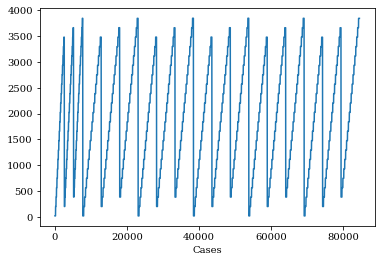

In [30]:
ax = plt.plot(data['traced_edges'])
plt.xlabel("Cases")

In [31]:
data.shape

(84480, 38)

In [32]:
data.groupby(['q','r'])['T'].count()

q     r   
0.05  0.00    1408
      0.05    1408
      0.10    1408
      0.15    1408
      0.20    1408
      0.25    1408
      0.30    1408
      0.35    1408
      0.40    1408
      0.45    1408
      0.50    1408
      0.55    1408
      0.60    1408
      0.65    1408
      0.70    1408
      0.75    1408
      0.80    1408
      0.85    1408
      0.90    1408
      0.95    1408
0.50  0.00    1408
      0.05    1408
      0.10    1408
      0.15    1408
      0.20    1408
      0.25    1408
      0.30    1408
      0.35    1408
      0.40    1408
      0.45    1408
      0.50    1408
      0.55    1408
      0.60    1408
      0.65    1408
      0.70    1408
      0.75    1408
      0.80    1408
      0.85    1408
      0.90    1408
      0.95    1408
0.95  0.00    1408
      0.05    1408
      0.10    1408
      0.15    1408
      0.20    1408
      0.25    1408
      0.30    1408
      0.35    1408
      0.40    1408
      0.45    1408
      0.50    1408
      0.55    1408
 

In [33]:
qrdata = data.groupby(['q','r'])['traced_edges_distant', 'traced_edges_close'].agg(['mean'])
qrdata.count()

/tmp/ipykernel_49323/1592122030.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  qrdata = data.groupby(['q','r'])['traced_edges_distant', 'traced_edges_close'].agg(['mean'])


traced_edges_distant  mean    60
traced_edges_close    mean    60
dtype: int64

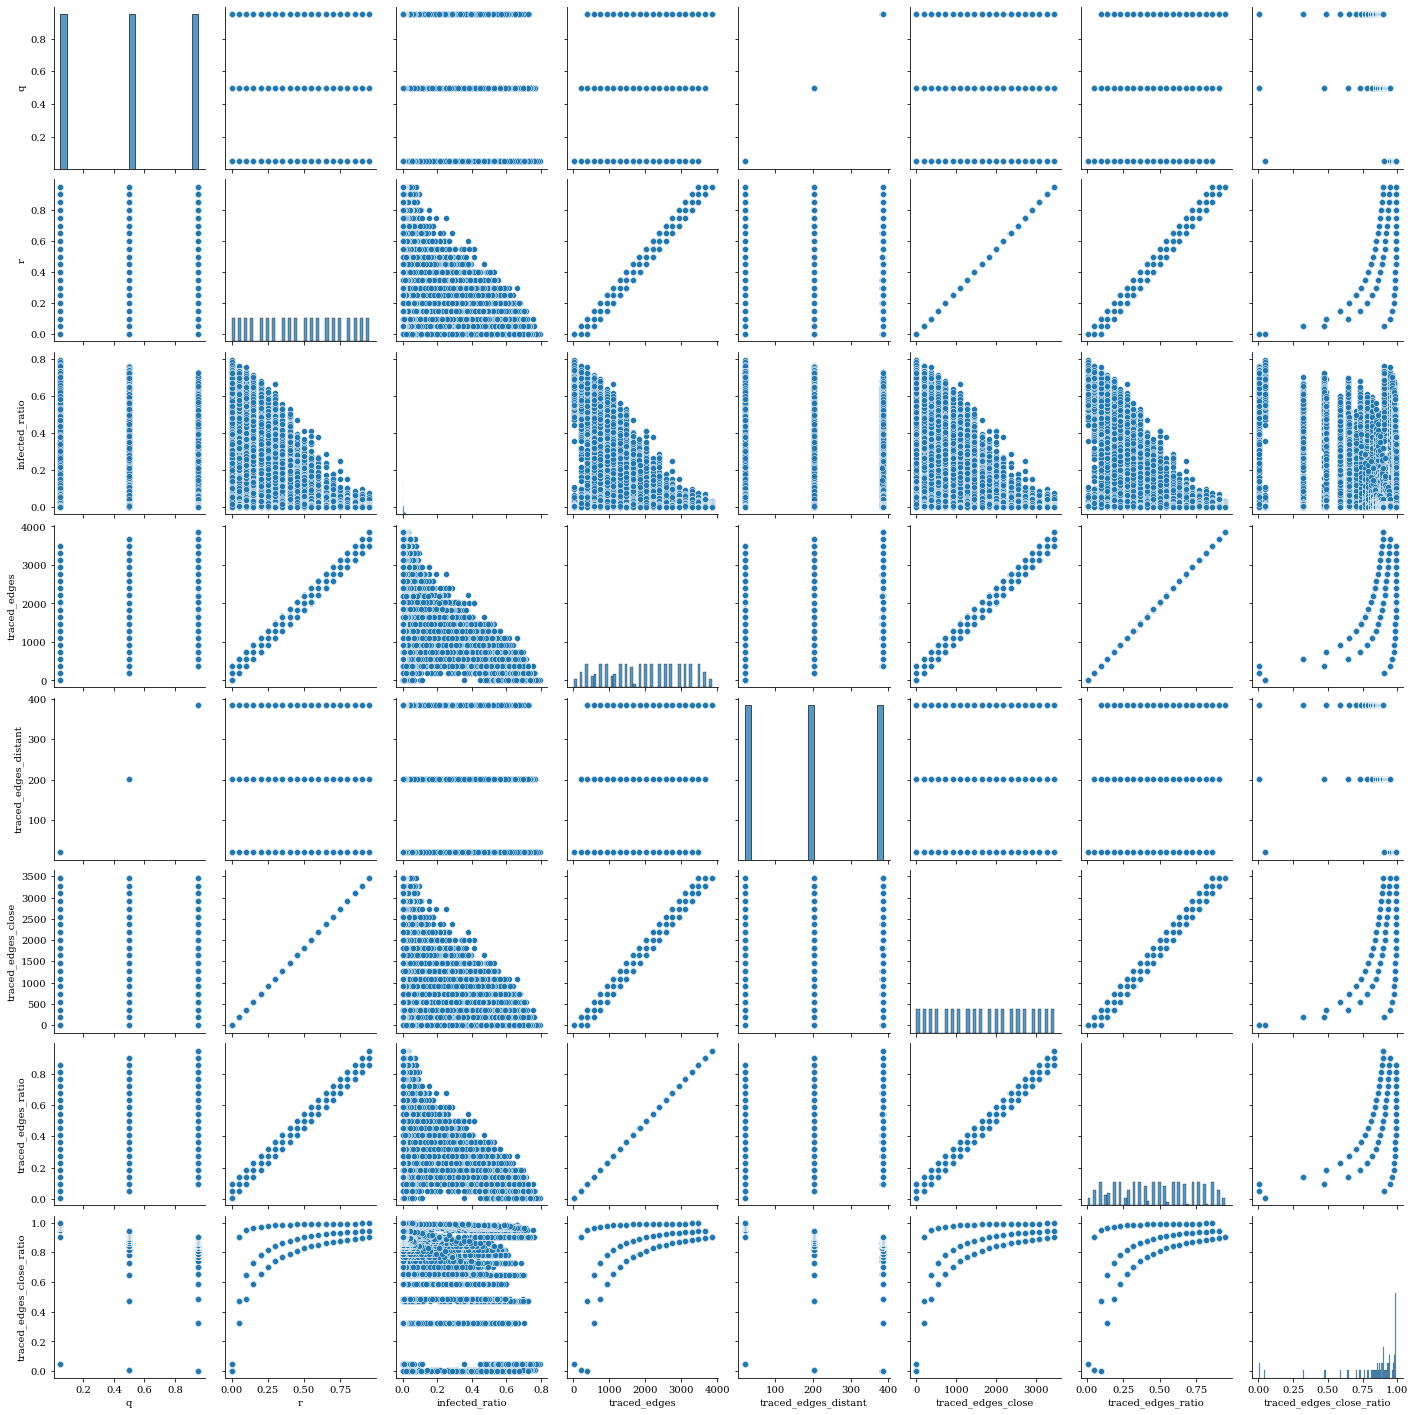

In [34]:
sns.pairplot(
    data[[
        'q','r',
        'infected_ratio',
        'traced_edges',
        'traced_edges_distant',
        'traced_edges_close',
        'traced_edges_ratio',
        "traced_edges_close_ratio"
    ]
    ])

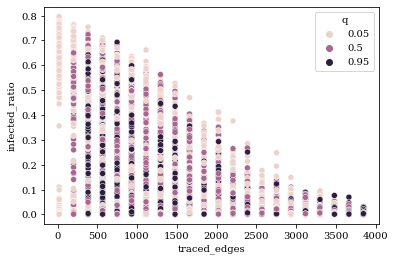

In [35]:
g = sns.scatterplot(
    data = data.sample(frac=1),
    y = 'infected_ratio',
    x = 'traced_edges',
    hue = 'q'
)

In [36]:
data[['infected_ratio', 'q', 'r', 'traced_edges', 'traced_edges_distant', 'traced_edges_close']].corr(
    method='spearman'
).dropna(how='all').dropna(axis=1,how='all')['infected_ratio']

infected_ratio          1.000000
q                      -0.037408
r                      -0.216839
traced_edges           -0.220001
traced_edges_distant   -0.038579
traced_edges_close     -0.216857
Name: infected_ratio, dtype: float64

In [37]:
import pingouin as pg
pg.partial_corr(
    data=data,
    x='traced_edges_close',
    y='infected_ratio',
    covar='traced_edges_distant',
    method='spearman'
)

,n,r,CI95%,p-val
spearman,84480,-0.216895,"[-0.22, -0.21]",0.0


In [38]:
import pingouin as pg
pg.partial_corr(
    data=data,
    x='traced_edges_close',
    y='infected_ratio',
    method='spearman'
)

,n,r,CI95%,p-val
spearman,84480,-0.216857,"[-0.22, -0.21]",0.0


In [39]:
pg.partial_corr(data=data, x='traced_edges', y='infected_ratio')

,n,r,CI95%,p-val
pearson,84480,-0.425149,"[-0.43, -0.42]",0.0


/home/sb/.local/lib/python3.9/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.4.0, the latest is 0.5.1.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


Text(0, 0.5, 'final infected proportion')

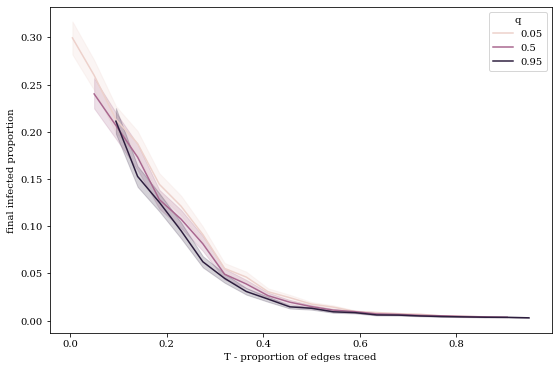

In [44]:
plt.figure(figsize=(9,6))

ax = sns.lineplot(
    x='T',
    y='infected_ratio',
    hue='q',
    data=data
)

ax.set_xlabel("T - proportion of edges traced")
ax.set_ylabel("final infected proportion")

### Separating out the epidemic cases

We use the fact that the "natural" behavior of the simulation is when there is no contact tracing.
This is the case where there is the clearest distinction between early extinction and epidemic cases.

We use this distribution to identify the infection threshold of early extinction, considering anything higher than it an 'epidemic'. 

We then carry this threshold value through in analysis of cases with contact tracing.

We distinguish between the conditions under which contact tracing increases the probability of early extinction, and the conditions it reduces the size of the epidemic.

In [45]:
low_CT_data = data[(data['q'] == 0.05) & (data['r'] == 0.0)]

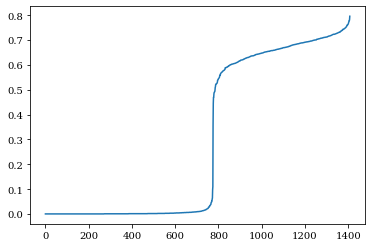

In [46]:
plt.plot(low_CT_data['infected_ratio'].sort_values().values)

In [47]:


values = low_CT_data['infected_ratio'].sort_values().values

def find_lower_mode_cutoff(values, tolerance):

    cutoff_idx = 0
    
    for i in range(len(values) - 1):
        cutoff_value = values[i]
    
        if not np.any(values[i+1:] < cutoff_value * tolerance):
            cutoff_idx = i

    return cutoff_idx, values[cutoff_idx]

## The resulting value here is robust to a very wide range of tolerance values.
idx_cutoff, cutoff = find_lower_mode_cutoff(values, 3)

idx_cutoff, cutoff, values[idx_cutoff]

(774, 0.1101234567901234, 0.1101234567901234)

In [48]:
data['upper_mode'] = data['infected_ratio'] > cutoff

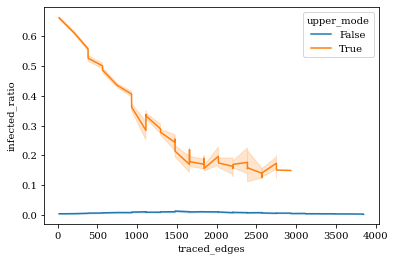

In [49]:
plt.rc('text', usetex=False)
g = sns.lineplot(
    data = data.fillna(0),
    y = 'infected_ratio',
    x = 'traced_edges',
    hue='upper_mode'
)

<AxesSubplot:xlabel='traced_edges'>

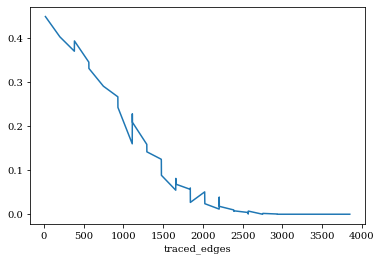

In [50]:
data.groupby('traced_edges')['upper_mode'].mean().plot()

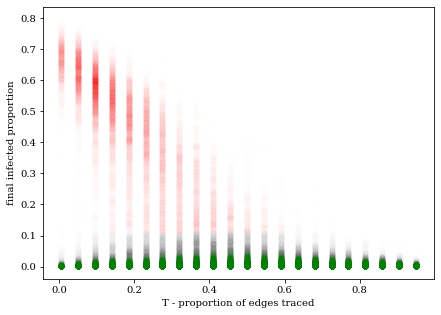

In [74]:

plt.figure(figsize=(7,5))

data_upper = data[data['upper_mode']]
data_lower = data[~data['upper_mode']]


d = data[data['upper_mode']]
plt.scatter(d['T'], d['infected_ratio'], color = 'red', alpha=0.005, label="epidemic")
    
d = data[~data['upper_mode']]
plt.scatter(d['T'], d['infected_ratio'], color = 'green', alpha=0.005, label="early extinction")

#plt.plot(X_upper, Y_upper_pred, color='yellow')
#plt.plot(X_lower, Y_lower_pred, color='cyan')

#plt.legend()
plt.xlabel('T - proportion of edges traced')
plt.ylabel('final infected proportion')
plt.show()

#### Notes on the hypotheses

Three stories:
 - (a) distant edges not a big deal because they are no different from close edges
 - (b) distant edges are less effective as close edges
 - (c) distant edges can have a slightly bigger effect of close edges but it's not be enough because $p$
 
 The question is: what is the difference in effect of a distant edge vs. a close edge?

[Text(0.5, 1.0, 'Infected ratio with variable tracing'),
 Text(0.5, 16.0, 'q'),
 Text(33.99999999999999, 0.5, 'r')]

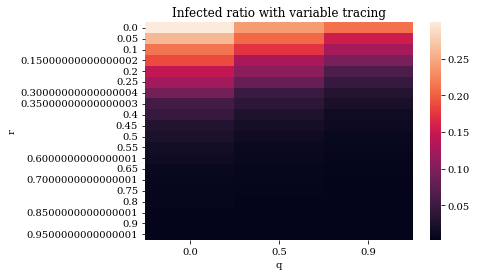

In [75]:
base = 0.05

g, xyz, db = model.binned_heatmap(
    data,
    x = 'q',
    x_base = base * 2,
    y = 'r',
    y_base = base,
    z = 'infected_ratio'
)

g.set(#xscale="log",
      title='Infected ratio with variable tracing',
      xlabel='q',
      ylabel='r')

[Text(0.5, 1.0, 'Infected ratio with variable tracing'),
 Text(0.5, 16.0, 'q'),
 Text(33.99999999999999, 0.5, 'T')]

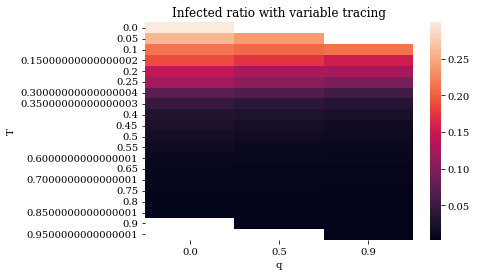

In [76]:
base = 0.05

g, xyz, db = model.binned_heatmap(
    data,
    x = 'q',
    x_base = base * 2,
    y = 'T',
    y_base = base,
    z = 'infected_ratio'
)

g.set(#xscale="log",
      title='Infected ratio with variable tracing',
      xlabel='q',
      ylabel='T')

In [77]:
data[['q','r','upper_mode']]

um_data_g = data.groupby(['q','T'])['upper_mode', 'infected_ratio'].mean().reset_index()

/tmp/ipykernel_49323/1130196930.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  um_data_g = data.groupby(['q','T'])['upper_mode', 'infected_ratio'].mean().reset_index()


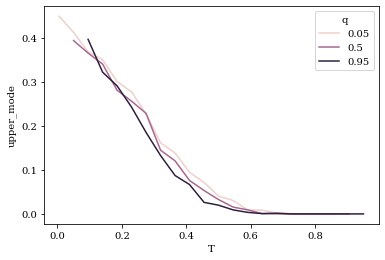

In [78]:
plt.rc('text', usetex=False)
g = sns.lineplot(
    data = um_data_g,
    y = 'upper_mode',
    x = 'T',
    hue='q'
)

In [79]:
qrdata = data.groupby(['q','r'])['infected_ratio'].agg(['mean','std','var','count'])
qrdata['upper_count'] = data.groupby(['q','r'])['upper_mode'].sum() / data.groupby(['q','r'])['case'].count()
#qrdata['upper_count'] = data.groupby(['q','r'])['upper_mode'].sum()
qrdata['upper_mean'] = data[data['upper_mode']].groupby(['q','r'])['infected_ratio'].mean()
qrdata['lower_mean'] = data[~data['upper_mode']].groupby(['q','r'])['infected_ratio'].mean()

qrdata['weighted_upper_mean'] = qrdata['upper_mean'] * qrdata['upper_count']# / qrdata['count']

qrdata = qrdata.reset_index()

p = .1

qrdata['T'] = qrdata['q'] * p + qrdata['r'] * (1 - p)

In [80]:
# qrdata

<AxesSubplot:xlabel='T', ylabel='upper_mean'>

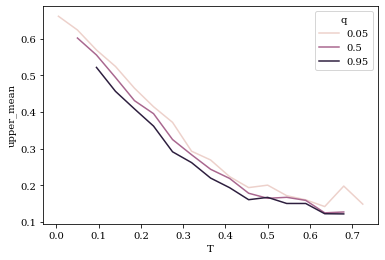

In [81]:
sns.lineplot(
    data=qrdata,
    x = 'T',
    y = 'upper_mean',
    hue = 'q'
)

Text(0.5, 0, 'T - proportion of edges traced')

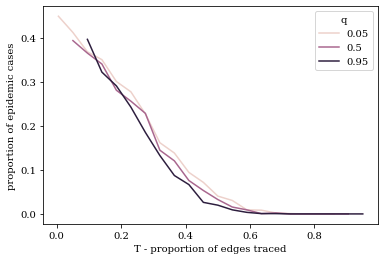

In [87]:
plt.figure(figsize=(6,4))

ax = sns.lineplot(
    data=qrdata,
    x = 'T',
    y = 'upper_count',
    hue = 'q'
)

ax.set_ylabel("proportion of epidemic cases")
plt.xlabel('T - proportion of edges traced')

<AxesSubplot:xlabel='T', ylabel='weighted_upper_mean'>

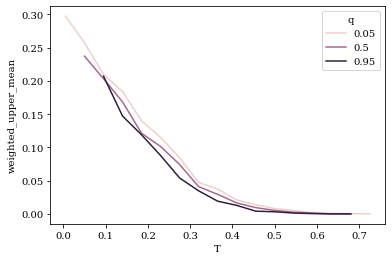

In [83]:
sns.lineplot(
    data=qrdata,
    x = 'T',
    y = 'weighted_upper_mean',
    hue = 'q'
)

### Comparing shift in q with shift in r

The results above confirm a small advantage to distant edges over close edges.

However, if we are trying to determine the tradeoff between tracing of close and distant edges, then we need to compare the marginal gain from a shift in `q` with a marginal gain from a shift in `r`.

<AxesSubplot:xlabel='r'>

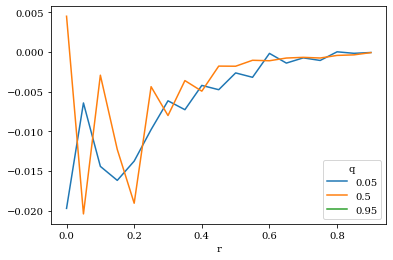

In [84]:
delta_r_diff_mean = qrdata.pivot('q','r','mean').diff(axis=1).shift(-1, axis=1)
delta_q_diff_mean = qrdata.pivot('q','r','mean').diff(axis=0).shift(-1, axis=0)

cd_diff = delta_q_diff_mean - delta_r_diff_mean

cd_diff.T.plot()

Text(0, 0.5, 'Mean difference in epidemic proportion')

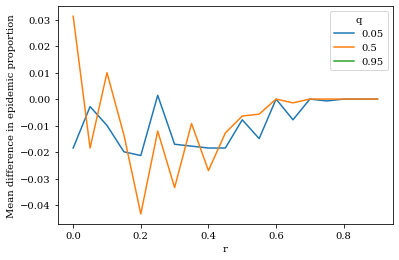

In [85]:
delta_r_diff_mean = qrdata.pivot('q','r','upper_count').diff(axis=1).shift(-1, axis=1)
delta_q_diff_mean = qrdata.pivot('q','r','upper_count').diff(axis=0).shift(-1, axis=0)

cd_diff = delta_q_diff_mean - delta_r_diff_mean

ax = cd_diff.T.plot()

ax.set_ylabel("Mean difference in epidemic proportion")

In [63]:
delta_q_diff_mean

r,0.00,0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50,0.55,0.60,0.65,0.70,0.75,0.80,0.85,0.90,0.95
q,,,,,,,,,,,,,,,,,,,,
0.05,-0.055398,-0.046875,-0.027699,-0.069602,-0.044744,-0.049006,-0.082386,-0.041193,-0.062500,-0.041193,-0.039062,-0.024858,-0.021307,-0.008523,-0.006392,-0.002131,-0.00071,0.0,0.0,0.0
0.50,0.002841,-0.043324,-0.049716,-0.038352,-0.071023,-0.095881,-0.057528,-0.053977,-0.049716,-0.033381,-0.023438,-0.012074,-0.008523,0.000000,-0.002131,0.000000,0.00000,0.0,0.0,0.0
0.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
delta_r_diff_mean

r,0.00,0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50,0.55,0.60,0.65,0.70,0.75,0.80,0.85,0.90,0.95
q,,,,,,,,,,,,,,,,,,,,
0.05,-0.036932,-0.044034,-0.017756,-0.049716,-0.023438,-0.050426,-0.065341,-0.023438,-0.044034,-0.022727,-0.031250,-0.009943,-0.021307,-0.00071,-0.006392,-0.00142,-0.00071,0.0,0.0,NaN
0.50,-0.028409,-0.024858,-0.059659,-0.024858,-0.027699,-0.083807,-0.024148,-0.044744,-0.022727,-0.020597,-0.017045,-0.006392,-0.008523,0.00142,-0.002131,0.00000,0.00000,0.0,0.0,NaN
0.95,-0.074574,-0.031250,-0.048295,-0.057528,-0.052557,-0.045455,-0.020597,-0.040483,-0.006392,-0.010653,-0.005682,-0.002841,0.000000,-0.00071,0.000000,0.00000,0.00000,0.0,0.0,NaN


<AxesSubplot:xlabel='r'>

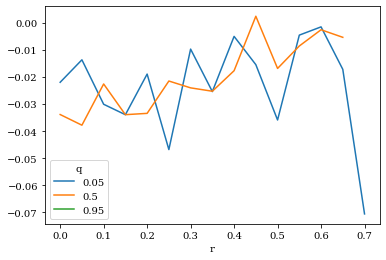

In [65]:
delta_r_diff_mean = qrdata.pivot('q','r','upper_mean').diff(axis=1).shift(-1, axis=1)
delta_q_diff_mean = qrdata.pivot('q','r','upper_mean').diff(axis=0).shift(-1, axis=0)

cd_diff = delta_q_diff_mean - delta_r_diff_mean

cd_diff.T.plot()

In [66]:
delta_q_diff_mean

r,0.00,0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50,0.55,0.60,0.65,0.70,0.75,0.80,0.85,0.90,0.95
q,,,,,,,,,,,,,,,,,,,,
0.05,-0.059381,-0.068119,-0.074920,-0.093262,-0.069255,-0.089450,-0.088262,-0.049241,-0.050316,-0.045265,-0.029171,-0.033148,-0.012804,-0.035366,-0.014815,NaN,NaN,NaN,NaN,NaN
0.50,-0.080052,-0.099113,-0.085758,-0.069243,-0.103985,-0.062895,-0.063585,-0.050186,-0.057966,-0.011259,-0.014076,-0.016831,-0.036429,-0.002963,NaN,NaN,NaN,NaN,NaN,NaN
0.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
delta_r_diff_mean

r,0.00,0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50,0.55,0.60,0.65,0.70,0.75,0.80,0.85,0.90,0.95
q,,,,,,,,,,,,,,,,,,,,
0.05,-0.037474,-0.054528,-0.044882,-0.059357,-0.050383,-0.042643,-0.078635,-0.023892,-0.045393,-0.029884,0.006686,-0.028696,-0.011399,-0.018246,0.055802,-0.049218,NaN,NaN,NaN,NaN
0.50,-0.046213,-0.061329,-0.063223,-0.035350,-0.070578,-0.041455,-0.039614,-0.024967,-0.040342,-0.013790,0.002709,-0.008352,-0.033960,0.002305,NaN,NaN,NaN,NaN,NaN,NaN
0.95,-0.065274,-0.047974,-0.046708,-0.070092,-0.029488,-0.042144,-0.026215,-0.032747,0.006365,-0.016607,-0.000046,-0.027951,-0.000494,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='r'>

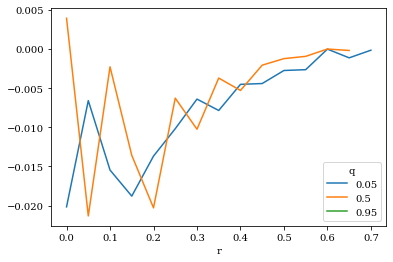

In [68]:
delta_r_diff_weighted_mean = qrdata.pivot('q','r','weighted_upper_mean').diff(axis=1).shift(-1, axis=1)
delta_q_diff_weighted_mean = qrdata.pivot('q','r','weighted_upper_mean').diff(axis=0).shift(-1, axis=0)

cd_diff = delta_q_diff_weighted_mean - delta_r_diff_weighted_mean

cd_diff.T.plot()

## Relative effect of change in q and r on the infected ratio

The noise at the low end _might_ be resolvable with more data.